# "Prediction of house prices in California"

In [ ]:
# Import the necessary libraries

# For Data loading, Exploraotry Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.shape

(20640, 10)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df1 = df.copy()

# EDA

In [ ]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df1['total_bedrooms'] = df1['total_bedrooms'].fillna(df1['total_bedrooms'].median())
#ww check the imputation
df1.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

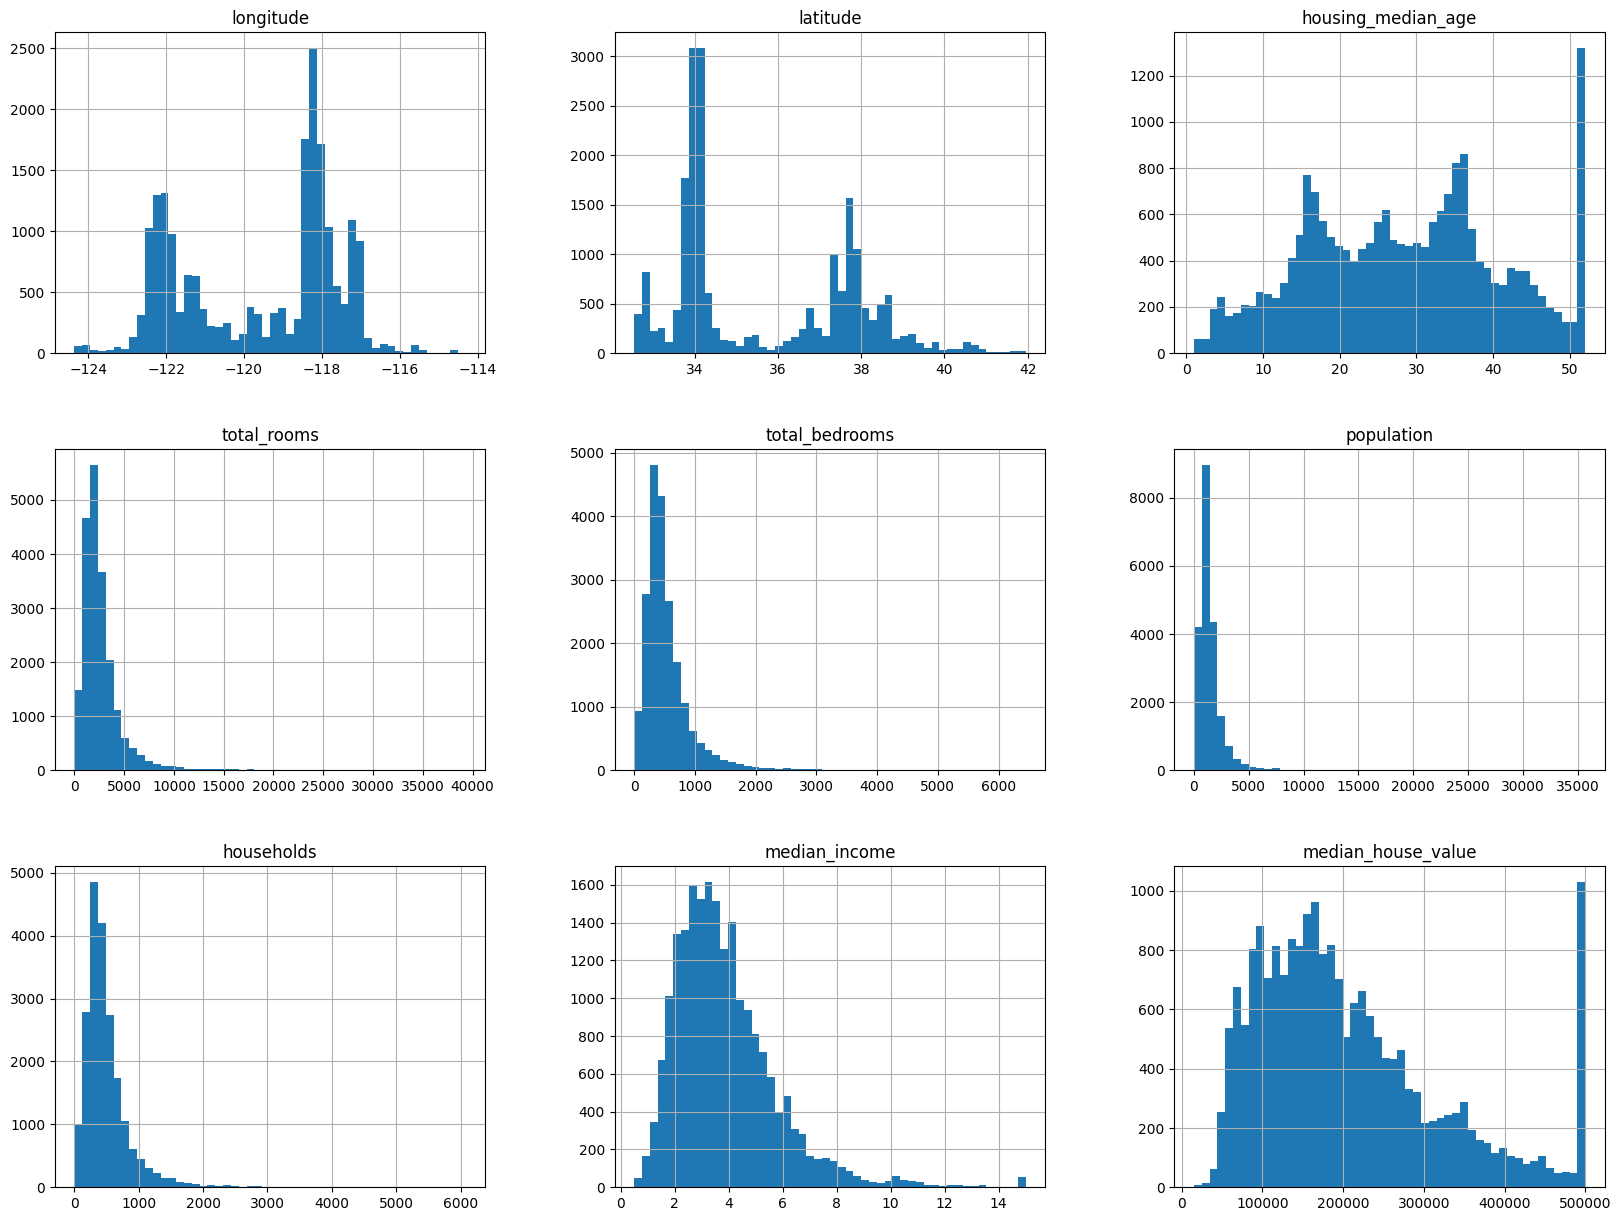

In [ ]:
df1.hist(bins=50, figsize=(20, 15))
plt.show()

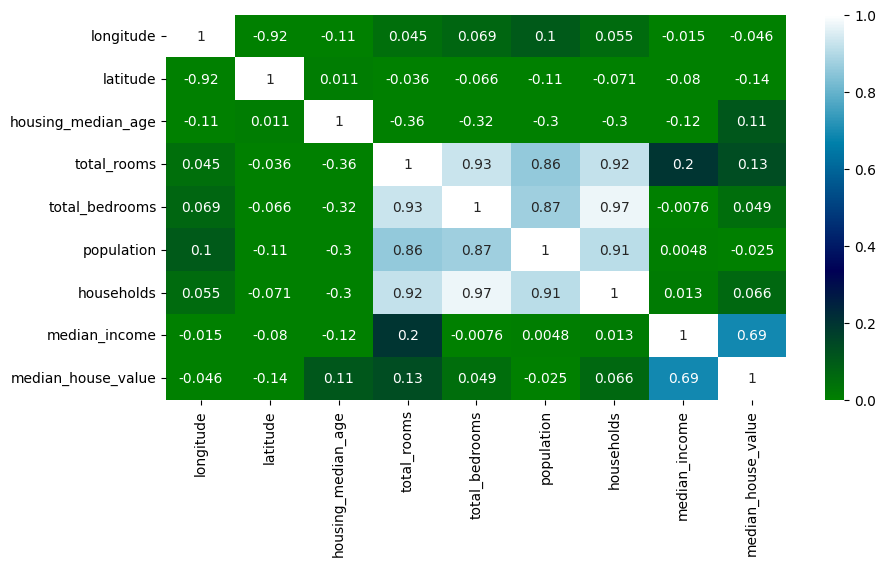

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_cols = df1.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
corr_matrix = numeric_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, vmin=0, vmax=1, cmap='ocean')
plt.show()

The columns 'total rooms', 'total bedrooms', 'population', and 'households' show high correlation. It's best to keep only one of these variables to avoid data overdimensionality. But which of these four variables would be the most appropriate?

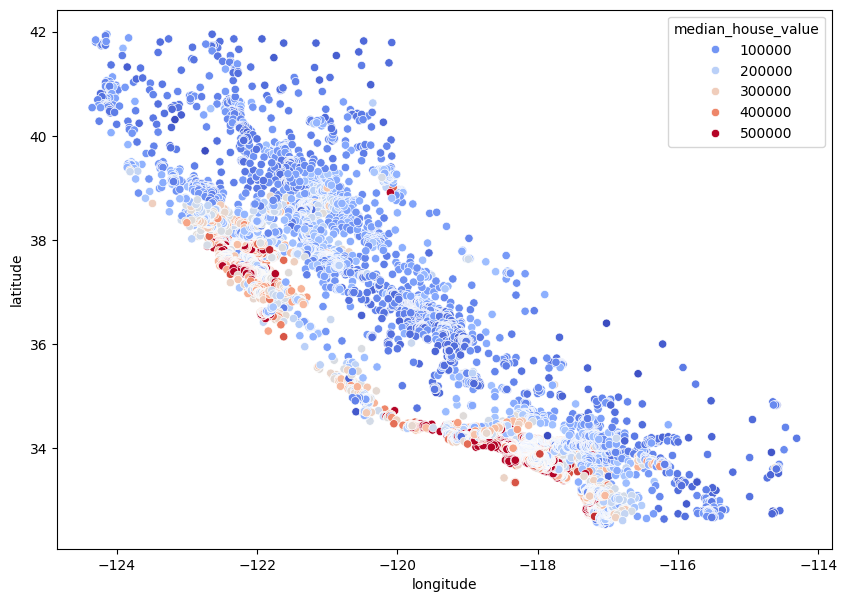

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(df1, x="longitude", y="latitude", hue='median_house_value', palette='coolwarm')
plt.show()

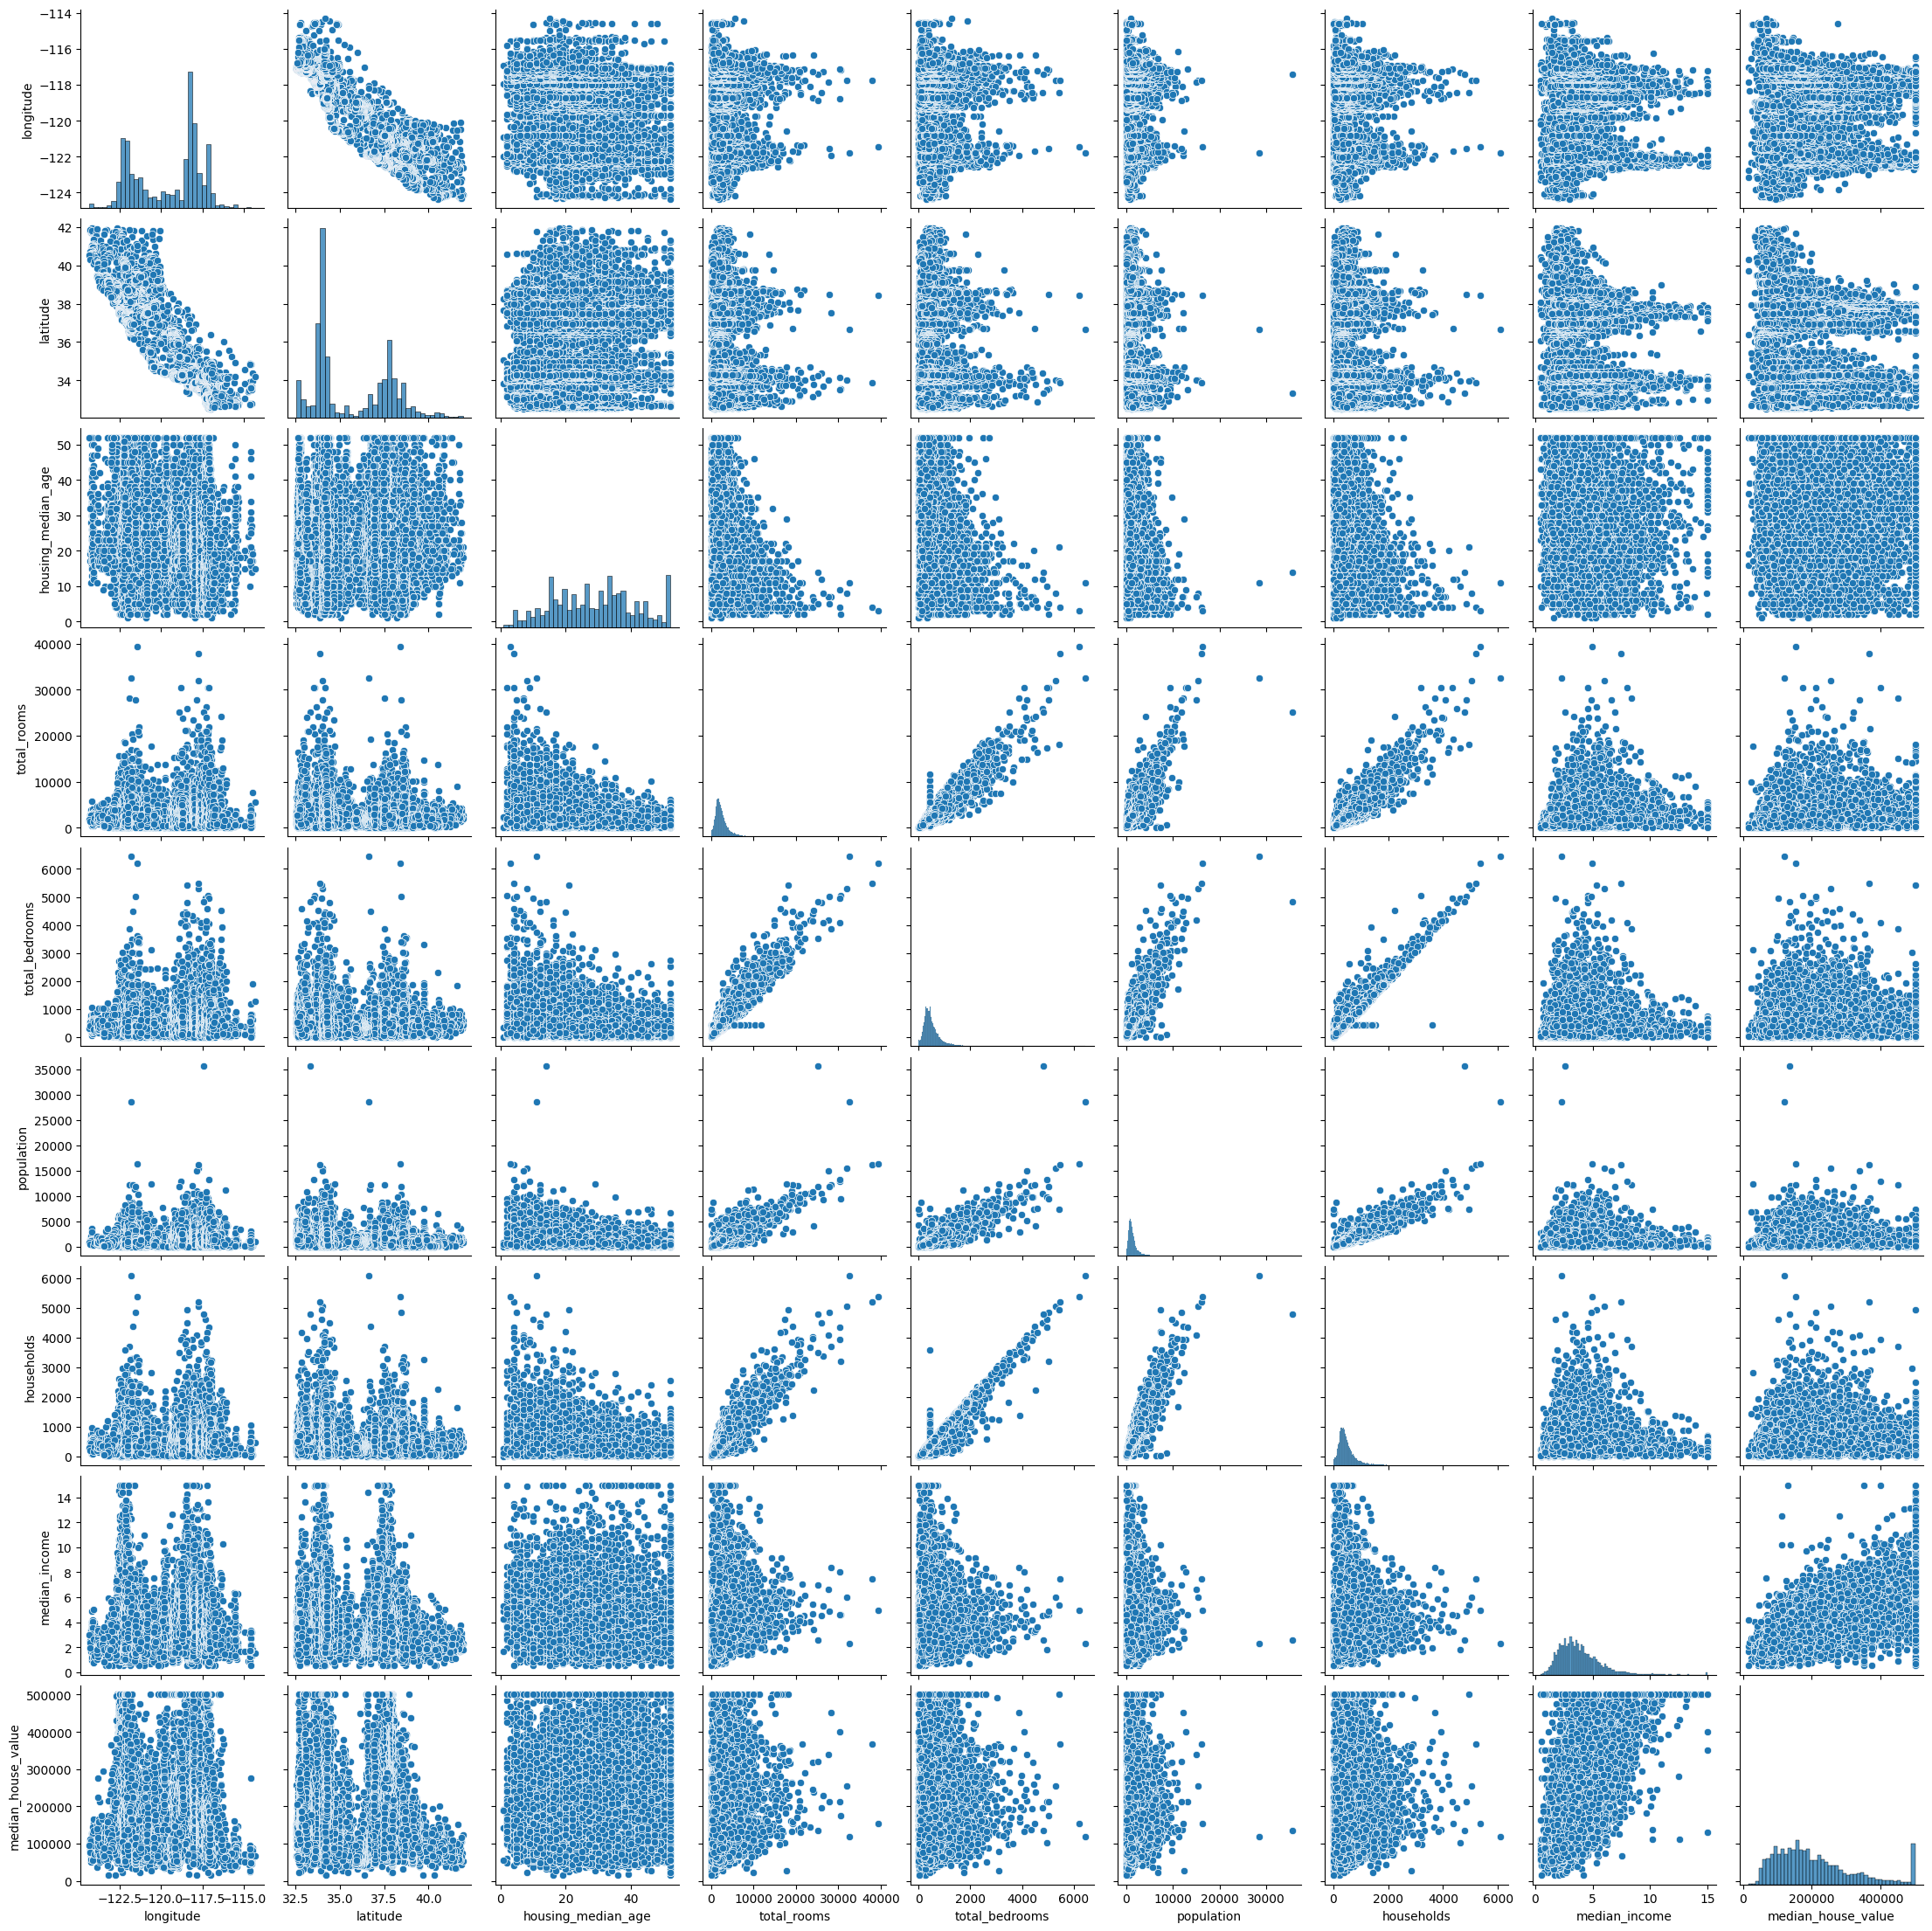

In [ ]:
sns.pairplot(df1)

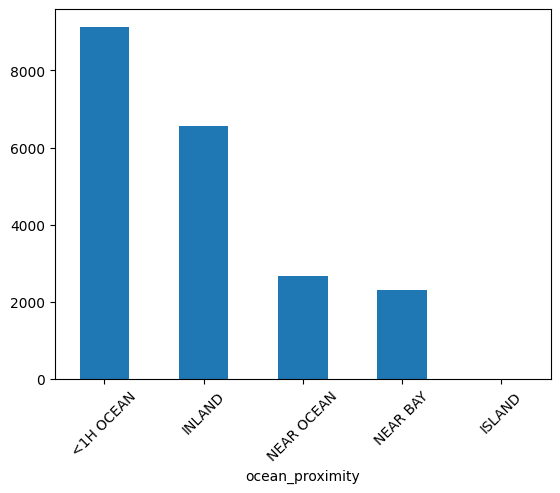

In [ ]:
df1['ocean_proximity'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

# Preprocessing

## Outliers

Text(0.5, 1.0, 'Boxplot de median_income')

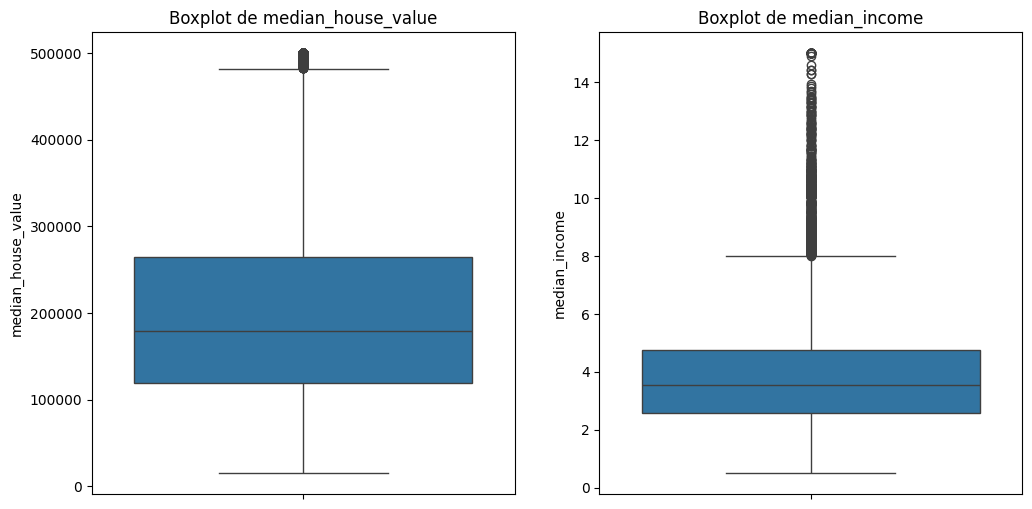

In [ ]:
# Crear subtramas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Graficar en la primera subtrama (axs[0])
sns.boxplot(data=df1, y='median_house_value', ax=axs[0])
axs[0].set_title('Boxplot de median_house_value')

# Graficar en la segunda subtrama (axs[1])
sns.boxplot(data=df1, y='median_income', ax=axs[1])
axs[1].set_title('Boxplot de median_income')


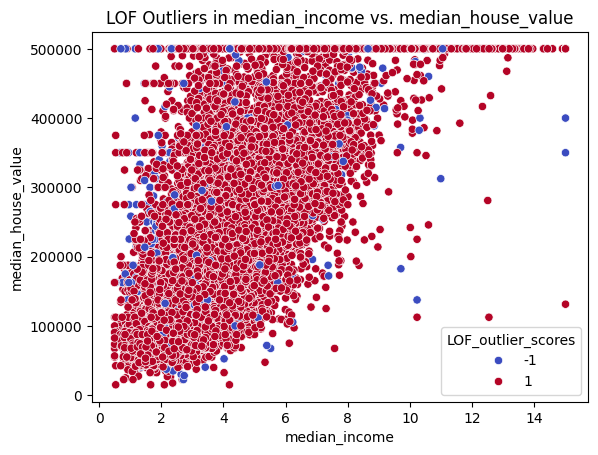

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

num_cols = df1.select_dtypes(include='number')

# Instantiate LOF
lof_outlier = LocalOutlierFactor(n_neighbors=5)

# Fit and predict outliers
outlier_scores = lof_outlier.fit_predict(num_cols)

# Add outlier scores as a new column in df1
df1['LOF_outlier_scores'] = outlier_scores


sns.scatterplot(df1,x="median_income", y="median_house_value", hue="LOF_outlier_scores", palette="coolwarm")
plt.title("LOF Outliers in median_income vs. median_house_value")
plt.show()

In [ ]:
#number of outliers detected
sum(outlier_scores == -1)

726

In [ ]:

#we drop the outliers
mask = outlier_scores != -1
df1 = df1.loc[mask,:]


df1 = df1.drop(columns=['LOF_outlier_scores'])

## Dummies

transforming categorical column to numeric

In [ ]:
df1 = pd.get_dummies(df1, columns=['ocean_proximity'], prefix=['O_P_'], dtype=int)

In [ ]:
# df1['ocean_proximity'] = df1['ocean_proximity'].replace({'ISLAND':0,'NEAR OCEAN':1,'NEAR BAY':2, '<1H OCEAN':3,'INLAND':4})

## Normalization

Normalization with Keras

This specific normalization is known as "L2 normalization" or "L2 norm normalization," which is also referred to as "row normalization."

L2 norm normalization refers to scaling each row of a dataset so that its length (L2 norm) is equal to 1. This means that for each row in the dataset, the values are scaled such that the sum of the squares of the values is equal to 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#seleccionamos todas las columnas menos el target:
df1_scaled = df1.drop(columns=['median_house_value'])

# Creamos una instancia del escalador
scaler = MinMaxScaler()

# Estandariza las columnas numéricas seleccionadas
df1[df1_scaled.columns] = scaler.fit_transform(df1_scaled)

# Feature Selection

We will create an artificial context to evaluate which of those variables with high correlation, seen during the data exploration, is more suitable for predicting our target.

In [ ]:
X_art = df1[["total_rooms","total_bedrooms", "population","households"]]
y_art = df1['median_house_value']

X_art_scaled = X_art.copy()  # Copy df
X_art_scaled[X_art.columns] = scaler.fit_transform(X_art)  # Apply standarization


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor

# vbase model
modelo_base = KNeighborsRegressor()

# SFS selector
selector = SequentialFeatureSelector(estimator=modelo_base, n_features_to_select=1, direction='forward')

# Apply SFS
selector = selector.fit(X_art_scaled, y_art)

# Selected features
caracteristicas_seleccionadas = X_art_scaled.columns[selector.get_support(indices=True)]
print("Características seleccionadas:", caracteristicas_seleccionadas)

Características seleccionadas: Index(['total_rooms'], dtype='object')


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


modelo_base = DecisionTreeClassifier()


selector = RFE(estimator=modelo_base, n_features_to_select=1, step=1)


selector = selector.fit(X_art_scaled, y_art)

# Selected features
caracteristicas_seleccionadas = X_art_scaled.columns[selector.support_]

# eliminated features
caracteristicas_eliminadas = X_art_scaled.columns[~selector.support_]

print("Características seleccionadas:", caracteristicas_seleccionadas)

Características seleccionadas: Index(['total_rooms'], dtype='object')


If we trust the obtained results, we will stick with the "total rooms" variable.

# Target transformation

In [ ]:
df1["median_house_value"].describe()

count     19914.000000
mean     205787.184945
std      114350.013392
min       14999.000000
25%      119300.000000
50%      179200.000000
75%      263600.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
df1["median_house_value"] = np.log(df1["median_house_value"])

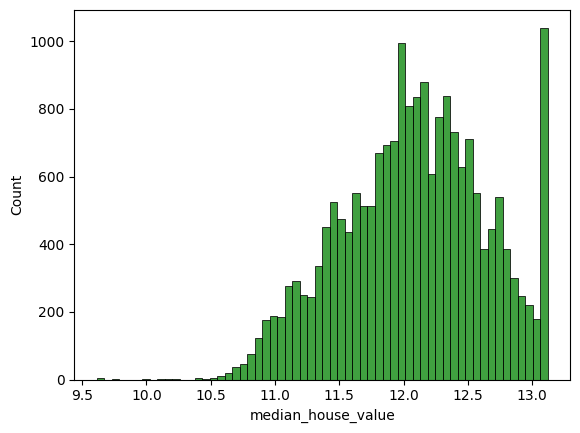

In [ ]:
sns.histplot(df1["median_house_value"], color = "green");

# Data split

In [ ]:
X = df1.drop(columns=['median_house_value', 'households','total_bedrooms','population'])
y = df1['median_house_value']

# X = df1[['longitude', 'latitude', 'housing_median_age', 'median_income','ocean_proximity']]
# y = df1['median_house_value']

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

print(X_train.shape,X_test.shape, X_val.shape, y_train.shape, y_val.shape, y_test.shape )

(13939, 10) (2987, 10) (2988, 10) (13939,) (2988,) (2987,)


# Model

In [ ]:
X_train.shape[1]

10

In [ ]:
from tensorflow import keras

NB_FEATURES =  X_train.shape[1]
NB_CLASSES = 1

model = Sequential()
model.add(Dense(128,input_dim=NB_FEATURES, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(1))

#Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
# Compile Model
opt = keras.optimizers.Adam(learning_rate=.001)
model.compile(optimizer=opt, loss='mse',metrics=['mse'])

# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),
                   epochs = 200, batch_size=32,
                    # callbacks=[early_stopping]
                    )

Epoch 1/200
436/436 [==============================] - 3s 4ms/step - loss: 8.1960 - mse: 8.1960 - val_loss: 0.4332 - val_mse: 0.4332
Epoch 2/200
436/436 [==============================] - 3s 6ms/step - loss: 1.4750 - mse: 1.4750 - val_loss: 0.7703 - val_mse: 0.7703
Epoch 3/200
436/436 [==============================] - 1s 3ms/step - loss: 1.2265 - mse: 1.2265 - val_loss: 0.3343 - val_mse: 0.3343
Epoch 4/200
436/436 [==============================] - 1s 3ms/step - loss: 1.0863 - mse: 1.0863 - val_loss: 0.3053 - val_mse: 0.3053
Epoch 5/200
436/436 [==============================] - 1s 3ms/step - loss: 0.9808 - mse: 0.9808 - val_loss: 0.1402 - val_mse: 0.1402
Epoch 6/200
436/436 [==============================] - 1s 3ms/step - loss: 0.9067 - mse: 0.9067 - val_loss: 0.1369 - val_mse: 0.1369
Epoch 7/200
436/436 [==============================] - 1s 2ms/step - loss: 0.8360 - mse: 0.8360 - val_loss: 0.1111 - val_mse: 0.1111
Epoch 8/200
436/436 [==============================] - 1s 3ms/step - 

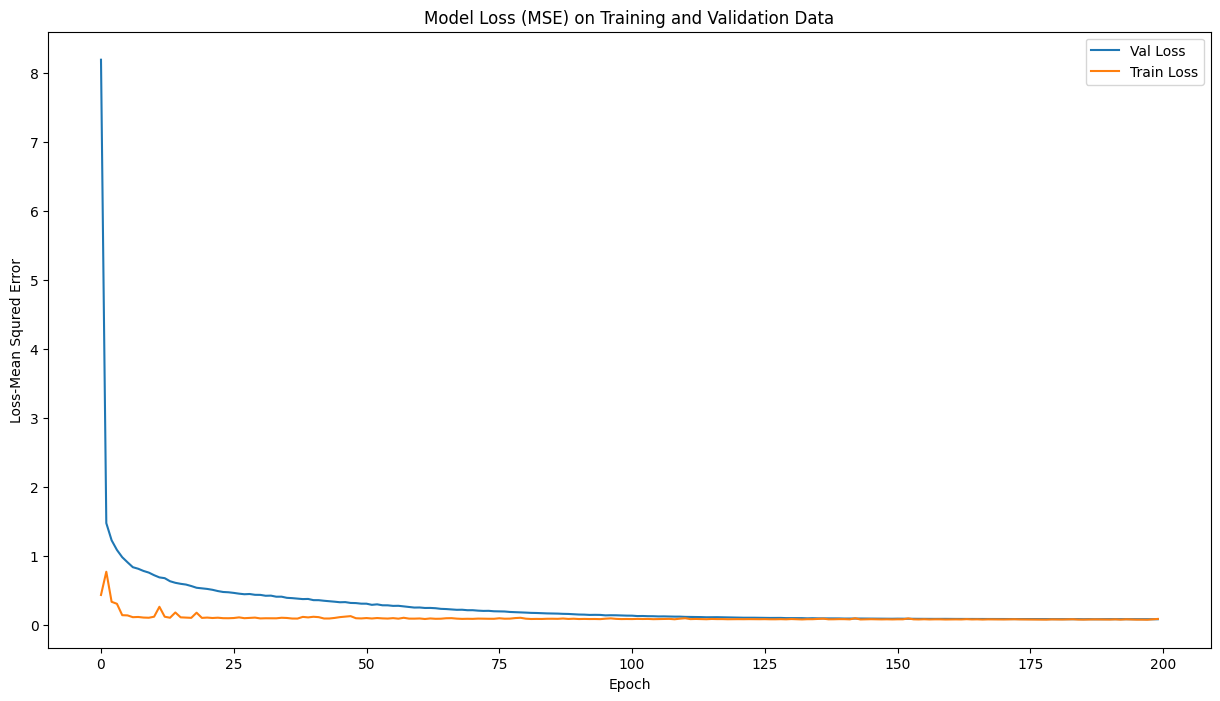

In [ ]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

# Predictions and metrics

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

EVS = explained_variance_score(y_test,y_pred)
R2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Explained variance score en el set de testeo: {EVS}')
print(f'R2 Score en el set de testeo: {R2_score}')

94/94 [==============================] - 0s 1ms/step
Explained variance score en el set de testeo: 0.759152890990001
R2 Score en el set de testeo: 0.7427133007219673
